# MNIST import



In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

Using TensorFlow backend.


(60000, 784)
(10000, 784)


In [5]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

encoding_dim = 2
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)

encoder = Model(input_img, encoded)
autoencoder=Model(input_img, decoded)

encoded_input = Input(shape=(encoding_dim,))
deco = autoencoder.layers[-3](encoded_input)
deco = autoencoder.layers[-2](deco)
deco = autoencoder.layers[-1](deco)
decoder = Model(encoded_input, deco)

autoencoder.compile(optimizer='adam', loss='logcosh')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.0374 - val_loss: 0.0362
Epoch 2/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0335 - val_loss: 0.0316
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0308 - val_loss: 0.0298
Epoch 4/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.0292 - val_loss: 0.0288
Epoch 5/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0283 - val_loss: 0.0281
Epoch 6/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0278 - val_loss: 0.0276
Epoch 7/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.0273 - val_loss: 0.0272
Epoch 8/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0268 - val_los

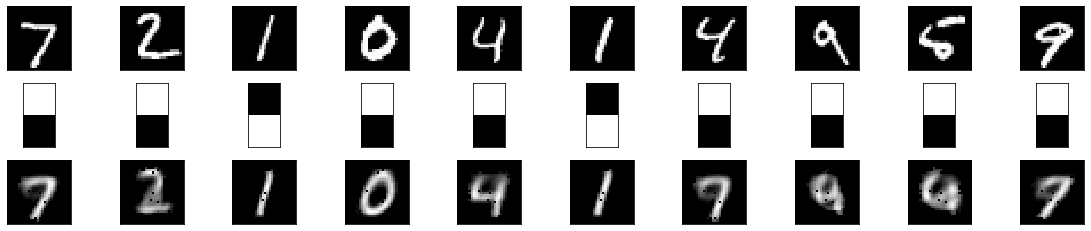

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(2,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

# Generating random digits

In [0]:

generated_inputs = np.asarray([[x, y] for x in np.arange(0, 1, 0.1)
                               for y in np.arange(0, 1, 0.1)], dtype=np.float32)
generated = decoder.predict(generated_inputs)

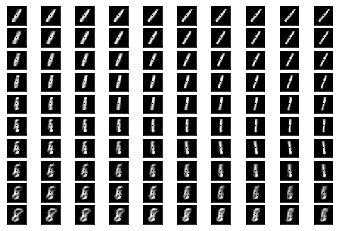

In [13]:
import matplotlib.pyplot as plt

for i in range(100):
    # display original images
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(generated[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

In [15]:
print(encoded_imgs[0])

[1.6010551 0.7873676]
